In [ ]:
import joblib
(A,terms,snippets) = joblib.load( "articles-raw.pkl" )
print( "Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

# Konu Modelleme için bir araç ve teknik olan Latent Dirichlet Allocation (LDA), metni bir belgeye ve konu başına kelimelere sınıflandırır veya kategorilere ayırır, bunlar Dirichlet dağılımlarına ve süreçlerine göre modellenir.

#### n_components : Boyutsallık azaltma için bileşen sayısı
#### max_iter : Eğitim verileri üzerinden maksimum geçiş sayısı 
#### learning_method : Güncelleştirmek için kullanılan yöntem. Genel olarak, veri boyutu büyükse "online" güncelleştirme "batch" güncelleştirmeden çok daha hızlı olacaktır.
#### learning_offset : "online" öğrenmede erken yinelemeleri azaltan (pozitif) bir parametre.
#### random_state : Birden çok işlev çağrısında yeniden üretilebilir sonuçlar için yazılır.

In [4]:
from sklearn.decomposition import LatentDirichletAllocation
k=15
model = LatentDirichletAllocation(n_components=k, max_iter=50, learning_method='online', learning_offset=50.,random_state=0).fit(A)
W = model.fit_transform( A )
H = model.components_

In [5]:
W.shape

(21879, 15)

In [6]:
H.shape

(15, 2452)

In [7]:
import numpy as np
def get_descriptor( terms, H, topic_index, top ):
    #indeksleri sıralamak için değerleri ters sıralama
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # şimdi en üst sıradaki endekslere karşılık gelen terimleri alın
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
    return top_terms

# en sık kullanılan kelimeler 

In [8]:
descriptors = []
for topic_index in range(k):
    descriptors.append( get_descriptor( terms, H, topic_index, 10 ) )
    str_descriptor = ", ".join( descriptors[topic_index] )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: ukraine, russian, ukrainian, ukrainewar, forces, region, russia, destroyed, military, armed
Topic 02: war, russian, ukraine, life, soldier, crimes, russia, first, trial, poland
Topic 03: azov, azovstal, nazis, fuck, mariupol, nazi, ukraine, nnukraine, russiawarcrimes, russiaukrainewar
Topic 04: russia, ukraine, day, war, says, east, mariupol, russiaukraine, putin, ukrainians
Topic 05: ukraine, russia, war, years, russian, lost, months, territory, ukraines, russias
Topic 06: ukraine, support, fight, nft, nftcommunity, showing, stands, non, metaverse, tyranny
Topic 07: ukraine, war, kyiv, new, mariupol, kiev, kharkiv, russian, times, azovstal
Topic 08: sanctions, zelensky, russia, ukraine, eu, president, davos, oil, money, world
Topic 09: elonmusk, patron, dog, ukraine, agree, nft, dogecoin, nftcommumity, rogozin, cooler
Topic 10: china, ukraine, biden, taiwan, russia, invasion, russias, says, defend, invade
Topic 11: ukraine, russia, nato, war, people, finland, countries, swed

In [9]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

In [10]:
def plot_top_term_weights( terms, H, topic_index, top ):
    # en iyi terimleri ve ağırlıklarını alın
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
        top_weights.append( H[topic_index,term_index] )
    
    top_terms.reverse()
    top_weights.reverse()
   
    fig = plt.figure(figsize=(13,8))
    
    ypos = np.arange(top)
    ax = plt.barh(ypos, top_weights, align="center", color="green",tick_label=top_terms)
    plt.xlabel("Term Weight",fontsize=14)
    plt.tight_layout()
    plt.show()

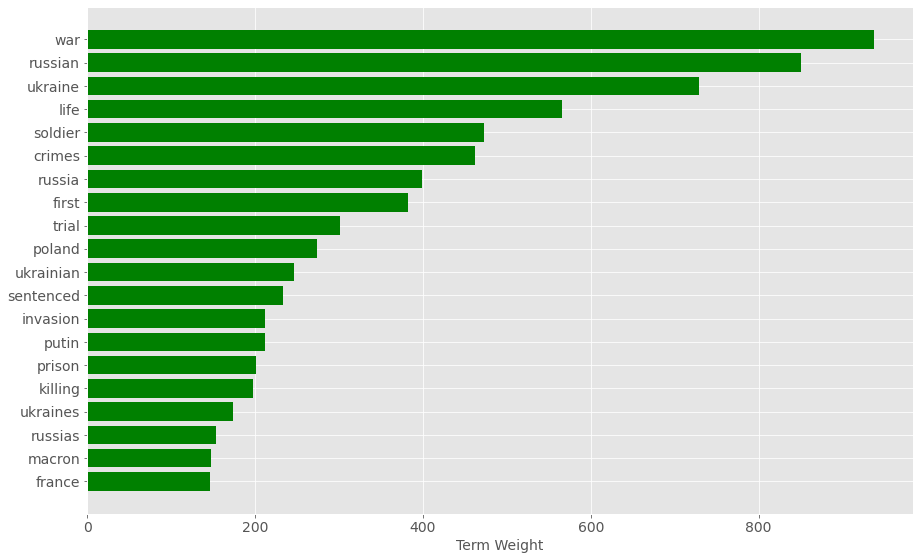

In [11]:
plot_top_term_weights( terms, H, 1, 20 )

In [12]:
def get_top_snippets( all_snippets, W, topic_index, top ):
    # indeksleri sıralamak için değerleri ters sıralama
    top_indices = np.argsort( W[:,topic_index] )[::-1]
    # şimdi en üst sıradaki endekslere karşılık gelen snippet'leri alın
    top_snippets = []
    for doc_index in top_indices[0:top]:
        top_snippets.append( all_snippets[doc_index] )
    return top_snippets

In [13]:
topic_snippets = get_top_snippets( snippets, W, 0, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. BREAKING The Ukrainian Air Assault forces claim to have shot down  more  Russian Orlan reconnaissanc
02. RALee BREAKING NEWS  Ukraine Air Brigade Destroying Russian ArmynnhttpstcoAjJrUZKEXnnBreakingNews Uk
03. RALee BREAKING NEWS  Ukraine Air Brigade Destroying Russian ArmynnhttpstcoAjJrUZKEXnnBreakingNews Uk
04. RALee BREAKING NEWS  Ukraine Air Brigade Destroying Russian ArmynnhttpstcoAjJrUZKEXnnBreakingNews Uk
05. RALee BREAKING NEWS  Ukraine Air Brigade Destroying Russian ArmynnhttpstcoAjJrUZKEXnnBreakingNews Uk
06. KyivIndependent BREAKING NEWS  Ukraine Air Brigade Destroying Russian ArmynnhttpstcoAjJrUZKEXnnBreak
07. KyivIndependent BREAKING NEWS  Ukraine Air Brigade Destroying Russian ArmynnhttpstcoAjJrUZKEXnnBreak
08. Breaking A video footage of PZR Piorun MANPADS with the troops of th Air Assault Brigade of Ukraine 
09. FoxNews BREAKING NEWS  Ukraine Air Brigade Destroying Russian ArmynnhttpstcoAjJrUZKEXnnBreakingNews 
10. FoxNews marklevinshow BREAKING NEWS  Ukraine Air Br

# Ağırlıklı tweetler

In [14]:
topic_snippets = get_top_snippets( snippets, W, 1, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. Reuters Reuters Im a blogger Poland Brutus Macron wants Putin to save face nI invite you to my blogn
02. A yearold Russian soldier was sentenced to life in prison on Monday for killing an unarmed man in Uk
03. A court in Kyiv has found yearold Russian soldier Vadim Shishimarin guilty of war crimes and sentenc
04. A court in Kyiv has found yearold Russian soldier Vadim Shishimarin guilty of war crimes and sentenc
05. nexta_tv nexta_tv Im a blogger Poland Brutus Macron wants Putin to save face nI invite you to my blo
06. Reuters Reuters Im a blogger Poland Zelenskyy a true leader president and symbol I invite to my blog
07. Vadim Shishimarin a yearold Russian soldier was found guilty of war crimes and sentenced to life in 
08. LaStampa LaStampa Im a blogger Poland When you are truly proud of your presidentnI invite you to vis
09. LaStampa LaStampa Im a blogger Poland When you are truly proud of your presidentnI invite you to vis
10. The start of justice Court in Ukraine has jailed a 

In [15]:
joblib.dump((W,H,terms,snippets), "articles-model-lda-k%02d.pkl" % k) 

['articles-model-lda-k15.pkl']